# Présentation du jeu de données


## Attendu du livrable


Il s'agit de votre présentation intégrant votre notebook Jupyter (qui sera envoyé la veille de la soutenance) et votre présentation de 20 minutes qui devra montrer l'ensemble de votre démarche :
* La génération de votre/vos jeux de données en justifiant les choix et les traitements effectués pour faire face aux problématiques classiques de ce type de travail.
* le choix de (des) l'algorithme(s) d'"IA" retenu(s).
* l'analyse des résultats obtenus et leur interprétation en s'appuyant sur des métriques.
* La démarche mise en œuvre pour améliorer un modèle.
* le choix du modèle retenu au final parmi les différents essais effectués en justifiant pas rapport au besoin de votre client et des métriques.
* vos propositions finales justifiées
### Récapitulation de l'étude éthique
Pour ce projet, nous allons utiliser un jeu de données modifié (cf. [Éthique des données](ethique_des_donnees.ipynb)) en fonction de la problématique éthique de l'utilisation des données et de l'IA. Il vérifie les différentes réglementations en vigueur (RGPD, CNIL, etc.) et respec les principes de l'éthique.

Pour définir si ce jeu de données est suffisant même emputé de ses données non éthiques, nous allons faire le même traitement que pour le jeu de données original.
|Pas utile|Pas éthique|
|:-|:-|
|"Over18"|Supprimer les personne de moins de 18 ans (cf. RGPD)|
|"EducationField"|"Gender" => peut porter à la discrimination|
|"EmployeeCount" = 0|"MaritalStatus" => peut porter à la discrimination|
|~"StockOptionLevel"||
## Visualisation des données
### General Data
Il y a des données manquantes dans les colonnes **NumCompaniesWorked** et **TotalWorkingYears**.

Certaines données ne sont pas des nombres mais des chaînes de caractères. Il faut donc les transformer en nombres.
# Load data from general_data.csv
df_general = load_data(GENERAL_DATA_PATH)
# Visualize the information of the dataframe
df_general.info()
### Employee Survey Data
Il y a des données manquantes dans les colonnes **EnvironmentSatisfaction**, **JobSatisfaction** et **WorkLifeBalance**.
# Load data from employee_survey_data.csv
df_employee_survey = load_data(EMPLOYEE_SURVEY_DATA_PATH)
# Visualize the information of the dataframe
df_employee_survey.info()
### Manager Survey Data
# Load data from manager_survey_data.csv
df_manager_survey = load_data(MANAGER_SURVEY_DATA_PATH)
# Visualize the information of the dataframe
df_manager_survey.info()
# Load data from in_time.csv
df_in_time = load_data(IN_TIME_DATA_PATH)
# Visualize the information of the dataframe
df_in_time.info()
# Load data from out_time.csv
df_out_time = load_data(OUT_TIME_DATA_PATH)
# Visualize the information of the dataframe
df_out_time.info()

# Pré-traitement des données


Voici quelques étapes à suivre pour pré-traiter les données pour une utilisation avec K-means :

1. Intégration des données : Intégrez les données des différentes sources en une seule source de données. Si vous travaillez avec des données provenant de plusieurs sources, vous devez les intégrer en une seule source de données. Cela vous permettra de traiter les données comme une seule entité et de les analyser plus facilement.

1. Nettoyer les données : Assurez-vous que vos données sont propres et ne contiennent pas de valeurs manquantes, de doublons ou d'autres anomalies. Si nécessaire, supprimez ou remplacez les données manquantes.

1. Normaliser les données : Normalisez les données en les mettant à l'échelle de sorte que chaque variable ait une plage de valeurs comparable. La normalisation peut être effectuée en utilisant la méthode de la moyenne et de l'écart type, la méthode de la plage ou la méthode de la normalisation de l'amplitude.

1. Réduire la dimensionnalité : Si vous travaillez avec des données à haute dimensionnalité, utilisez des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) pour réduire la dimensionnalité de vos données et faciliter leur analyse.

1. Identifier les valeurs aberrantes : Les valeurs aberrantes peuvent fausser les résultats de K-means, il est donc important de les identifier et de les traiter correctement. Les valeurs aberrantes peuvent être supprimées ou remplacées par des valeurs plus appropriées.

1. Sélectionner les caractéristiques : Si vous travaillez avec des données qui contiennent de nombreuses caractéristiques, il peut être judicieux de sélectionner les caractéristiques les plus pertinentes pour votre analyse.

En résumé, le pré-traitement des données pour K-means comprend le nettoyage des données, la normalisation des données, la réduction de la dimensionnalité, l'identification et le traitement des valeurs aberrantes et la sélection des caractéristiques. En effectuant ces étapes, vous pouvez améliorer la qualité de vos données et obtenir des résultats plus significatifs à l'aide de K-means.


## Acquisition des données

Collecter des données brutes à partir de diverses sources, telles que des capteurs, des fichiers, des bases de données, etc.


In [37]:
import pandas as pd
import numpy as np
import os
from copy import deepcopy

# Settings
pd.set_option('display.max_columns', None)

# Global variables
GENERAL_DATA_PATH = "./data/general_data.csv"
EMPLOYEE_SURVEY_DATA_PATH = "./data/employee_survey_data.csv"
MANAGER_SURVEY_DATA_PATH = "./data/manager_survey_data.csv"
IN_TIME_DATA_PATH = "./data/in_out_time/in_time.csv"
OUT_TIME_DATA_PATH = "./data/in_out_time/out_time.csv"

In [38]:
def agregate_dataframes(list_df: list, on_column: str, how: str) -> pd.DataFrame:
    '''
    Merge dataframes.

    Parameters
    ----------
    list_df : list
        List of dataframes to merge.
    on_column : str
        Column to merge on.
    how : str
        Type of merge.

    Returns
    -------
    df_master : pandas.DataFrame
        Dataframe with all dataframes merged.

    Example
    -------
    >>> df1 = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
    >>> df2 = pd.DataFrame({"A": [1, 2, 3], "C": [7, 8, 9]})
    >>> df3 = pd.DataFrame({"A": [1, 2, 3], "D": [10, 11, 12]})
    >>> df_master = agregate_dataframes([df1, df2, df3], "A", "outer")
    >>> df_master
        A    B    C     D
    0  1.0  4.0  7.0  10.0
    1  2.0  5.0  8.0  11.0
    2  3.0  6.0  9.0  12.0
    '''
    df_master = list_df[0]
    for df in list_df[1:]:
        df_master = df_master.merge(df,
                                    on=on_column,
                                    how=how)
    return df_master


def avg_time(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Calculate the average time of in_time and out_time.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe with in_time or out_time.

    Returns
    -------
    df : pandas.DataFrame
        Dataframe with EmployeeID and AvgTime.

    Example
    -------
    >>> df = pd.DataFrame({"EmployeeID": [1, 2, 3], "InTime": ["2020-01-01 08:00:00", "2020-01-01 08:00:00", "2020-01-01 08:00:00"]})
    >>> df = avg_time(df)
    >>> df
        EmployeeID   AvgTime
    0           1  08:00:00
    1           2  08:00:00
    2           3  08:00:00
    '''
    # Set first column as index
    df = df.copy().set_index(df.columns[0])
    # Remove first column
    df = df.copy().transpose()

    # Convert datetime to normalized time format
    df = df.apply(pd.to_datetime)
    df = df.apply(lambda x: x - x.dt.normalize())
    df = df.mean(skipna=True)
    # Add column EmployeeID
    df = df.to_frame().reset_index()
    df.columns = ["EmployeeID", "AvgTime"]
    return df

In [39]:
# Load data
df_general = pd.read_csv(GENERAL_DATA_PATH, sep=',')
df_employee_survey = pd.read_csv(EMPLOYEE_SURVEY_DATA_PATH, sep=',')
df_manager_survey = pd.read_csv(MANAGER_SURVEY_DATA_PATH, sep=',')
df_in_time = pd.read_csv(IN_TIME_DATA_PATH, sep=',')
df_out_time = pd.read_csv(OUT_TIME_DATA_PATH, sep=',')

# Merge dataframes
df_total = agregate_dataframes(
    [df_general, df_employee_survey, df_manager_survey],
    "EmployeeID",
    "outer"
)

# --- HANDLE IN AND OUT TIME ---
# Get average in time
avg_in_time_per_employee = avg_time(df_in_time)
# Get average out time
avg_out_time_per_employee = avg_time(df_out_time)
# Merge in and out time
avg_work_time_per_employee = avg_out_time_per_employee.copy()
avg_work_time_per_employee["AvgTime"] = avg_out_time_per_employee["AvgTime"] - \
    avg_in_time_per_employee["AvgTime"]
avg_work_time_per_employee["AvgTime"] = avg_work_time_per_employee["AvgTime"].apply(
    lambda x: x.total_seconds() / 3600)

# Merge with total dataframe
df_total = df_total.merge(
    avg_work_time_per_employee,
    on="EmployeeID",
    how="outer"
)

In [40]:
# Display a random sample of 5 rows
df_total.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgTime
4051,28,Yes,Travel_Rarely,Research & Development,25,3,Technical Degree,1,4052,Male,1,Research Director,Single,187890,3.0,Y,16,8,1,6.0,4,2,2,2,4.0,3.0,3.0,3,3,9.371957
3241,38,No,Travel_Rarely,Sales,10,3,Medical,1,3242,Male,4,Laboratory Technician,Married,181720,6.0,Y,12,8,2,6.0,5,1,0,1,4.0,3.0,1.0,3,3,10.898862
2109,59,No,Travel_Rarely,Research & Development,3,4,Technical Degree,1,2110,Male,1,Research Scientist,Single,40510,5.0,Y,16,8,3,13.0,3,6,0,5,3.0,4.0,3.0,3,3,7.442859
3268,24,No,Non-Travel,Sales,1,5,Marketing,1,3269,Female,1,Manufacturing Director,Divorced,81890,1.0,Y,14,8,1,1.0,3,1,0,0,3.0,2.0,3.0,3,3,6.813901
3835,18,Yes,Travel_Frequently,Research & Development,3,5,Medical,1,3836,Male,1,Research Director,Single,24790,1.0,Y,12,8,1,0.0,2,0,0,0,2.0,4.0,4.0,2,3,8.430085


## Prétraitement des données d'entrainement


Nettoyer, normaliser et préparer les données pour l'analyse ultérieure.


### Nettoyage des données ethiques et inutiles


Une étude préablable (cf. [Éthique des Données](./ethique_des_donnees.ipynb)) a permis de déterminer quels champs n'apportaient pas d'informations utiles à la prédiction. De même pour les champs non éthiques.


In [41]:
fields_not_useful = [
    "Over18",  # We have age
    "EducationField",  # We have Education
    "EmployeeCount",  # All at 1
    "StockOptionLevel",  # Not relevant
]
fields_not_ethical = [
    "Gender",
    "MaritalStatus",
]

# Datframe with only useful fields
df_useful = deepcopy(df_total)
df_useful.drop(
    fields_not_useful,
    axis=1,
    inplace=True
)
print("Shape useful:", df_useful.shape)

# Datframe with useful and ethical fields
df_ethical = deepcopy(df_total)
df_ethical.drop(
    fields_not_useful + fields_not_ethical,
    axis=1,
    inplace=True
)
print("Shape ethical:", df_ethical.shape)

# Delete to free memory
del fields_not_useful
del fields_not_ethical

Shape useful: (4410, 26)
Shape ethical: (4410, 24)


### Création du jeu d'entrainement et du jeu de test


Afin de pouvoir évaluer la qualité de notre modèle, nous allons séparer notre jeu de données en deux parties : un jeu d'entrainement et un jeu de test. Le jeu d'entrainement sera utilisé pour entraîner le modèle et le jeu de test sera utilisé pour évaluer la qualité du modèle.

Dans notre cas, nous allons utiliser 80% des données pour l'entrainement et 20% pour le test. La séparation est réalisée de manière aléatoire sur le champ cible (la colonne **Attrition**). De plus, avec le paramètre _stratify_, le jeu de données est séparé de manière à ce que la proportion de chaque classe soit la même dans les deux jeux de données créés.


In [42]:
from sklearn.model_selection import train_test_split

# Split train and test sets
X_useful_train_set, X_useful_test_set, y_useful_train_set, y_useful_test_set = train_test_split(
    df_useful, df_useful["Attrition"], stratify=df_useful["Attrition"], test_size=0.2, random_state=42)
X_ethical_train_set, X_ethical_test_set, y_ethical_train_set, y_ethical_test_set = train_test_split(
    df_ethical, df_ethical["Attrition"], stratify=df_ethical["Attrition"], test_size=0.2, random_state=42)

# Remove Attrition and EmployeeID from train and test sets
X_useful_train_set.drop(["Attrition", "EmployeeID"], axis=1, inplace=True)
X_useful_test_set.drop(["Attrition", "EmployeeID"], axis=1, inplace=True)
X_ethical_train_set.drop(["Attrition", "EmployeeID"], axis=1, inplace=True)
X_ethical_test_set.drop(["Attrition", "EmployeeID"], axis=1, inplace=True)

Le split donne les proportions suivantes :


In [43]:
X_useful_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   BusinessTravel           3528 non-null   object 
 2   Department               3528 non-null   object 
 3   DistanceFromHome         3528 non-null   int64  
 4   Education                3528 non-null   int64  
 5   Gender                   3528 non-null   object 
 6   JobLevel                 3528 non-null   int64  
 7   JobRole                  3528 non-null   object 
 8   MaritalStatus            3528 non-null   object 
 9   MonthlyIncome            3528 non-null   int64  
 10  NumCompaniesWorked       3512 non-null   float64
 11  PercentSalaryHike        3528 non-null   int64  
 12  StandardHours            3528 non-null   int64  
 13  TotalWorkingYears        3521 non-null   float64
 14  TrainingTimesLastYear

In [44]:
X_ethical_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 3331 to 4229
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      882 non-null    int64  
 1   BusinessTravel           882 non-null    object 
 2   Department               882 non-null    object 
 3   DistanceFromHome         882 non-null    int64  
 4   Education                882 non-null    int64  
 5   JobLevel                 882 non-null    int64  
 6   JobRole                  882 non-null    object 
 7   MonthlyIncome            882 non-null    int64  
 8   NumCompaniesWorked       879 non-null    float64
 9   PercentSalaryHike        882 non-null    int64  
 10  StandardHours            882 non-null    int64  
 11  TotalWorkingYears        880 non-null    float64
 12  TrainingTimesLastYear    882 non-null    int64  
 13  YearsAtCompany           882 non-null    int64  
 14  YearsSinceLastPromotio

In [45]:
X_useful_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 3331 to 4229
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      882 non-null    int64  
 1   BusinessTravel           882 non-null    object 
 2   Department               882 non-null    object 
 3   DistanceFromHome         882 non-null    int64  
 4   Education                882 non-null    int64  
 5   Gender                   882 non-null    object 
 6   JobLevel                 882 non-null    int64  
 7   JobRole                  882 non-null    object 
 8   MaritalStatus            882 non-null    object 
 9   MonthlyIncome            882 non-null    int64  
 10  NumCompaniesWorked       879 non-null    float64
 11  PercentSalaryHike        882 non-null    int64  
 12  StandardHours            882 non-null    int64  
 13  TotalWorkingYears        880 non-null    float64
 14  TrainingTimesLastYear 

### Pipeline de prétraitement


La pipeline fait référence à un ensemble d'étapes ou de processus qui sont exécutés séquentiellement pour traiter les données d'entrée, extraire des caractéristiques, entraîner le modèle et prédire les résultats.


In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """
    Class to add new columns to a dataframe from a list of columns to merge.

    Parameters
    ----------
    column_ids_to_merge : list[tuple[int]]
        List of tuples with the column ids to merge.

    Attributes
    ----------
    column_ids_to_merge : list[tuple[int]]
        List of tuples with the column ids to merge.

    Methods
    -------
    fit(X, y=None)
        Fit the model.

    transform(X, y=None)
        Transform the model.
    """

    def __init__(self, attribs_name_to_merge=[]):
        """
        Init the class.

        Parameters
        ----------
        column_ids_to_merge : list[tuple[int]]
            List of tuples with the column ids to merge.

        Returns
        -------
        None
        """
        self.attribs_name_to_merge = attribs_name_to_merge

    def fit(self, X=None, y=None):
        """
        Fit the model.

        Parameters
        ----------
        X : pandas.DataFrame
            The data to fit the model.

        y : pandas.DataFrame
            The target to fit the model.
            default: None

        Returns
        -------
        self
        """
        return self  # nothing else to do

    def transform(self, X, y=None):
        """
        Transform the model.

        Parameters
        ----------
        X : pandas.DataFrame
            The data to transform the model.

        y : pandas.DataFrame
            The target to transform the model.
            default: None

        Returns
        -------
        numpy.ndarray
            The transformed data.
        """
        if len(self.attribs_name_to_merge) == 0:
            return X
        for ctm in self.attribs_name_to_merge:
            # index1 * index2
            X["%sPer%s" % (ctm[0], ctm[1])] = X[ctm[0]] * X[ctm[1]]
        return X

    def set_output(self, transform):
        """
        Set the output of the model. But here we don't need it because the output is the same as the input.

        Parameters
        ----------
        output : numpy.ndarray
            The output of the model.

        Returns
        -------
        None
        """
        pass

In [47]:
# List of columns to merge to add columns
columns_to_merge = [
    ("TotalWorkingYears", "Age"),
    ("YearsAtCompany", "Age"),
    ("NumCompaniesWorked", "Age"),
    ("YearsSinceLastPromotion", "Age"),
    ("YearsWithCurrManager", "Age"),
    ("YearsAtCompany", "TotalWorkingYears"),
    ("YearsSinceLastPromotion", "TotalWorkingYears"),
    ("YearsWithCurrManager", "TotalWorkingYears"),
]

In [48]:
# -- Useful --
# Get numerical attributes
useful_train_set_num = X_useful_train_set.select_dtypes(include=[np.number])

# Create the pipeline for numerical attributes
num_pipeline_useful = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(columns_to_merge)),
    ('std_scaler', StandardScaler()),
]).set_output(transform="pandas")

In [49]:
# List of categorical attributes
useful_cat_attribs = ["BusinessTravel", "Department",
                      "JobRole", "Gender", "MaritalStatus"]

# Full pipeline
useful_full_pipeline = ColumnTransformer(transformers=[
    ("num", num_pipeline_useful, useful_train_set_num.keys()),
    ("cat", OneHotEncoder(sparse_output=False), useful_cat_attribs),
], remainder='passthrough').set_output(transform="pandas")

In [50]:
# -- Ethical And Useful --
# Get numerical attributes
ethical_train_set_num = X_ethical_train_set.select_dtypes(include=[np.number])

# Create the pipeline for numerical attributes
num_pipeline_ethical = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(columns_to_merge)),
    ('std_scaler', StandardScaler()),
]).set_output(transform="pandas")

# List of categorical attributes
ethical_cat_attribs = ["BusinessTravel", "Department", "JobRole"]

# Full pipeline
ethical_full_pipeline = ColumnTransformer([
    ("num", num_pipeline_ethical, ethical_train_set_num.keys()),
    ("cat", OneHotEncoder(sparse_output=False), ethical_cat_attribs),
]).set_output(transform="pandas")

In [51]:
# -- Useful --
useful_train_set_prepared = useful_full_pipeline.fit_transform(
    X_useful_train_set)
# -- Ethical --
ethical_train_set_prepared = ethical_full_pipeline.fit_transform(
    X_ethical_train_set)

In [52]:
useful_train_set_prepared

,num__Age,num__DistanceFromHome,num__Education,num__JobLevel,num__MonthlyIncome,num__NumCompaniesWorked,num__PercentSalaryHike,num__StandardHours,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,num__YearsSinceLastPromotion,num__YearsWithCurrManager,num__EnvironmentSatisfaction,num__JobSatisfaction,num__WorkLifeBalance,num__JobInvolvement,num__PerformanceRating,num__AvgTime,num__TotalWorkingYearsPerAge,num__YearsAtCompanyPerAge,num__NumCompaniesWorkedPerAge,num__YearsSinceLastPromotionPerAge,num__YearsWithCurrManagerPerAge,num__YearsAtCompanyPerTotalWorkingYears,num__YearsSinceLastPromotionPerTotalWorkingYears,num__YearsWithCurrManagerPerTotalWorkingYears,cat__BusinessTravel_Non-Travel,cat__BusinessTravel_Travel_Frequently,cat__BusinessTravel_Travel_Rarely,cat__Department_Human Resources,cat__Department_Research & Development,cat__Department_Sales,cat__JobRole_Healthcare Representative,cat__JobRole_Human Resources,cat__JobRole_Laboratory Technician,cat__JobRole_Manager,cat__JobRole_Manufacturing Director,cat__JobRole_Research Director,cat__JobRole_Research Scientist,cat__JobRole_Sales Executive,cat__JobRole_Sales Representative,cat__Gender_Female,cat__Gender_Male,cat__MaritalStatus_Divorced,cat__MaritalStatus_Married,cat__MaritalStatus_Single
3465,0.463140,-1.016618,1.05518,-0.969757,-0.259638,-0.679818,-0.341374,0.0,-0.160786,-0.615667,0.508815,-0.677208,1.098882,-0.661977,0.263919,0.337770,1.797989,-0.432065,0.154623,-0.125477,0.483351,-0.606598,-0.616267,1.130307,-0.039219,-0.474799,0.275159,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3485,-0.306868,-1.016618,-1.87606,-0.068228,-0.801808,0.119915,2.102113,0.0,-0.676822,0.162575,-1.149782,-0.677208,-1.146292,0.257856,1.169667,0.337770,0.381440,2.314467,-0.460246,-0.620968,-0.949552,-0.039101,-0.616267,-1.031418,-0.623994,-0.474799,-0.739777,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3052,-1.736884,0.087413,-0.89898,-0.969757,-0.235080,-0.679818,-0.884371,0.0,-1.321867,-0.615667,-0.983923,-0.677208,-1.146292,0.257856,-0.641828,0.337770,0.381440,-0.432065,-1.284879,-1.061138,-0.876159,-0.792662,-0.616267,-1.031418,-0.618146,-0.474799,-0.739777,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2012,-0.966876,-0.280597,0.07810,-0.068228,-0.742531,-0.679818,-0.341374,0.0,-1.321867,0.162575,-0.983923,-0.677208,-1.146292,-1.581810,-0.641828,0.337770,0.381440,-0.432065,-1.059293,-1.044301,-0.851695,-0.727539,-0.616267,-1.031418,-0.618146,-0.474799,-0.739777,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
426,0.353139,-1.016618,1.05518,-0.068228,2.698904,-0.279952,-0.341374,0.0,-0.031777,0.162575,-0.983923,-0.677208,-1.146292,-1.581810,-0.641828,-1.094505,0.381440,-0.432065,-1.219655,-0.053318,-0.809757,-0.243772,-0.616267,-1.031418,-0.559669,-0.474799,-0.739777,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.023135,1.314114,2.03226,-0.068228,0.067866,0.519781,-0.612873,0.0,-0.418804,-1.393910,-0.652203,-0.677208,-0.584999,-1.581810,0.263919,0.337770,0.381440,-0.432065,-0.134231,-0.399681,-0.561620,0.388847,-0.616267,-0.543712,-0.483648,-0.474799,-0.536790,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
613,-1.406880,2.295474,1.05518,0.833301,-0.761584,-0.679818,1.016119,0.0,-1.321867,1.719060,-0.983923,-0.677208,-1.146292,1.177689,-0.641828,-2.526780,0.381440,-0.432065,-0.849662,-1.053922,-0.865675,-0.764752,-0.616267,-1.031418,-0.618146,-0.474799,-0.739777,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
808,-0.416870,-0.280597,-0.89898,-0.068228,-0.581425,2.119247,1.830614,0.0,-0.418804,-0.615667,-0.320484,-0.677208,-0.584999,-1.581810,-0.6

In [53]:
ethical_train_set_prepared

,num__Age,num__DistanceFromHome,num__Education,num__JobLevel,num__MonthlyIncome,num__NumCompaniesWorked,num__PercentSalaryHike,num__StandardHours,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,num__YearsSinceLastPromotion,num__YearsWithCurrManager,num__EnvironmentSatisfaction,num__JobSatisfaction,num__WorkLifeBalance,num__JobInvolvement,num__PerformanceRating,num__AvgTime,num__TotalWorkingYearsPerAge,num__YearsAtCompanyPerAge,num__NumCompaniesWorkedPerAge,num__YearsSinceLastPromotionPerAge,num__YearsWithCurrManagerPerAge,num__YearsAtCompanyPerTotalWorkingYears,num__YearsSinceLastPromotionPerTotalWorkingYears,num__YearsWithCurrManagerPerTotalWorkingYears,cat__BusinessTravel_Non-Travel,cat__BusinessTravel_Travel_Frequently,cat__BusinessTravel_Travel_Rarely,cat__Department_Human Resources,cat__Department_Research & Development,cat__Department_Sales,cat__JobRole_Healthcare Representative,cat__JobRole_Human Resources,cat__JobRole_Laboratory Technician,cat__JobRole_Manager,cat__JobRole_Manufacturing Director,cat__JobRole_Research Director,cat__JobRole_Research Scientist,cat__JobRole_Sales Executive,cat__JobRole_Sales Representative
3465,0.463140,-1.016618,1.05518,-0.969757,-0.259638,-0.679818,-0.341374,0.0,-0.160786,-0.615667,0.508815,-0.677208,1.098882,-0.661977,0.263919,0.337770,1.797989,-0.432065,0.154623,-0.125477,0.483351,-0.606598,-0.616267,1.130307,-0.039219,-0.474799,0.275159,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3485,-0.306868,-1.016618,-1.87606,-0.068228,-0.801808,0.119915,2.102113,0.0,-0.676822,0.162575,-1.149782,-0.677208,-1.146292,0.257856,1.169667,0.337770,0.381440,2.314467,-0.460246,-0.620968,-0.949552,-0.039101,-0.616267,-1.031418,-0.623994,-0.474799,-0.739777,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3052,-1.736884,0.087413,-0.89898,-0.969757,-0.235080,-0.679818,-0.884371,0.0,-1.321867,-0.615667,-0.983923,-0.677208,-1.146292,0.257856,-0.641828,0.337770,0.381440,-0.432065,-1.284879,-1.061138,-0.876159,-0.792662,-0.616267,-1.031418,-0.618146,-0.474799,-0.739777,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,-0.966876,-0.280597,0.07810,-0.068228,-0.742531,-0.679818,-0.341374,0.0,-1.321867,0.162575,-0.983923,-0.677208,-1.146292,-1.581810,-0.641828,0.337770,0.381440,-0.432065,-1.059293,-1.044301,-0.851695,-0.727539,-0.616267,-1.031418,-0.618146,-0.474799,-0.739777,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
426,0.353139,-1.016618,1.05518,-0.068228,2.698904,-0.279952,-0.341374,0.0,-0.031777,0.162575,-0.983923,-0.677208,-1.146292,-1.581810,-0.641828,-1.094505,0.381440,-0.432065,-1.219655,-0.053318,-0.809757,-0.243772,-0.616267,-1.031418,-0.559669,-0.474799,-0.739777,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.023135,1.314114,2.03226,-0.068228,0.067866,0.519781,-0.612873,0.0,-0.418804,-1.393910,-0.652203,-0.677208,-0.584999,-1.581810,0.263919,0.337770,0.381440,-0.432065,-0.134231,-0.399681,-0.561620,0.388847,-0.616267,-0.543712,-0.483648,-0.474799,-0.536790,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
613,-1.406880,2.295474,1.05518,0.833301,-0.761584,-0.679818,1.016119,0.0,-1.321867,1.719060,-0.983923,-0.677208,-1.146292,1.177689,-0.641828,-2.526780,0.381440,-0.432065,-0.849662,-1.053922,-0.865675,-0.764752,-0.616267,-1.031418,-0.618146,-0.474799,-0.739777,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
808,-0.416870,-0.280597,-0.89898,-0.068228,-0.581425,2.119247,1.830614,0.0,-0.418804,-0.615667,-0.320484,-0.677208,-0.584999,-1.581810,-0.641828,0.337770,0.381440,2.314467,0.146307,-0.476651,-0.372896,1.468021,-0.616267,-0.596437,-0.390084,-0.474799,-0.536790,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2946,-0.966876,0.210083,-0.89898,-0.068228,-0.141931,-0.279952,1.287617,0.0,-0.805831,-0.615667,

In [54]:
# Delete to free memory
del columns_to_merge
del df_useful
del df_ethical
del X_useful_train_set
del X_ethical_train_set
del useful_train_set_num
del ethical_train_set_num
del useful_cat_attribs
del ethical_cat_attribs

### Réduction de la dimensionnalité


##### Analyse en composantes principales


In [55]:
import time
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


def plot_feature_importances(X: pd.DataFrame, y: pd.DataFrame, title: str):
    """
    Plot the feature importances and remove the features with a low importance (less than 0.01).

    Parameters
    ----------
    X : pandas.DataFrame
        The data to plot the feature importances.

    y : pandas.DataFrame
        The target to plot the feature importances.

    title : str
        The title of the plot.

    Returns
    -------
    pandas.DataFrame
        The data with the features with a low importance removed.

    list[str]
        The list of the features with a low importance removed.
    """
    feature_names = X.columns
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X, y)

    start_time = time.time()
    importances = forest.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in forest.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(
        f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity")
    fig.set_size_inches(10, 10)
    # Draw line at 0.01 threshold
    ax.axhline(y=0.01, linestyle='--', color='r')
    fig.tight_layout()
    # Remove useless features (less than 0.01)
    X = X[forest_importances[forest_importances > 0.01].index]
    return X, forest_importances[forest_importances <= 0.01].index

Elapsed time to compute the importances: 0.011 seconds


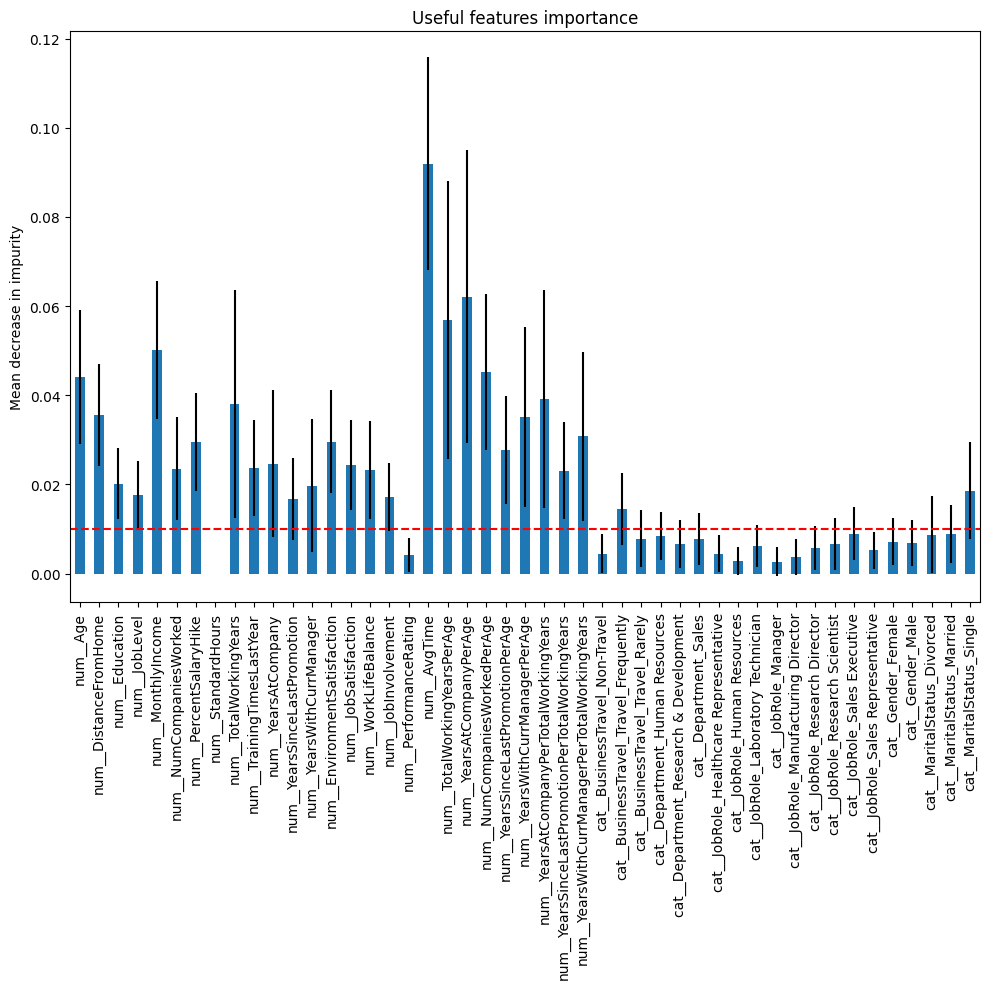

In [56]:
useful_train_set_prepared, useful_useless_features = plot_feature_importances(
    useful_train_set_prepared, y_useful_train_set, "Useful features importance")

In [57]:
useful_useless_features

Index(['num__StandardHours', 'num__PerformanceRating',
       'cat__BusinessTravel_Non-Travel', 'cat__BusinessTravel_Travel_Rarely',
       'cat__Department_Human Resources',
       'cat__Department_Research & Development', 'cat__Department_Sales',
       'cat__JobRole_Healthcare Representative',
       'cat__JobRole_Human Resources', 'cat__JobRole_Laboratory Technician',
       'cat__JobRole_Manager', 'cat__JobRole_Manufacturing Director',
       'cat__JobRole_Research Director', 'cat__JobRole_Research Scientist',
       'cat__JobRole_Sales Executive', 'cat__JobRole_Sales Representative',
       'cat__Gender_Female', 'cat__Gender_Male', 'cat__MaritalStatus_Divorced',
       'cat__MaritalStatus_Married'],
      dtype='object')

In [58]:
useful_train_set_prepared.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   num__Age                                          3528 non-null   float64
 1   num__DistanceFromHome                             3528 non-null   float64
 2   num__Education                                    3528 non-null   float64
 3   num__JobLevel                                     3528 non-null   float64
 4   num__MonthlyIncome                                3528 non-null   float64
 5   num__NumCompaniesWorked                           3528 non-null   float64
 6   num__PercentSalaryHike                            3528 non-null   float64
 7   num__TotalWorkingYears                            3528 non-null   float64
 8   num__TrainingTimesLastYear                        3528 non-null   float64
 9   num__YearsAtComp

Elapsed time to compute the importances: 0.010 seconds


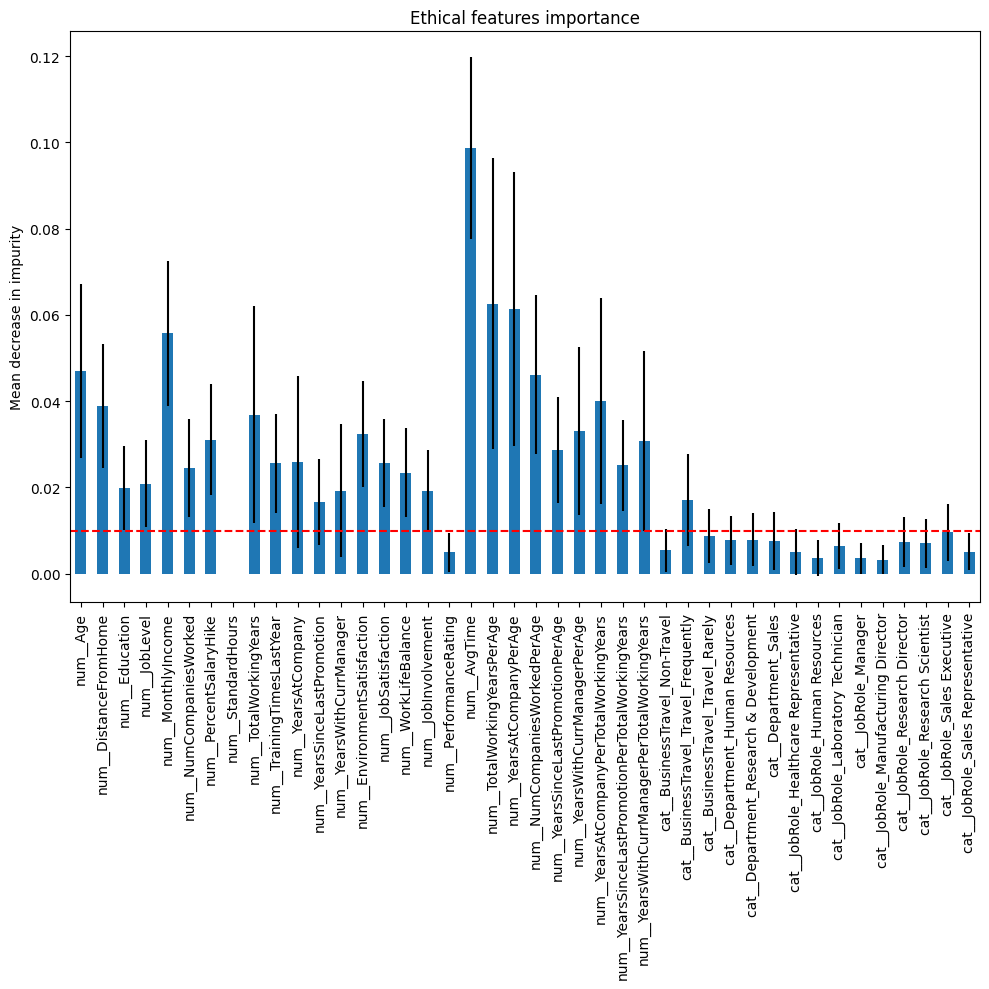

In [59]:
ethical_train_set_prepared, ethical_useless_features = plot_feature_importances(
    ethical_train_set_prepared, y_ethical_train_set, "Ethical features importance")

In [60]:
ethical_useless_features

Index(['num__StandardHours', 'num__PerformanceRating',
       'cat__BusinessTravel_Non-Travel', 'cat__BusinessTravel_Travel_Rarely',
       'cat__Department_Human Resources',
       'cat__Department_Research & Development', 'cat__Department_Sales',
       'cat__JobRole_Healthcare Representative',
       'cat__JobRole_Human Resources', 'cat__JobRole_Laboratory Technician',
       'cat__JobRole_Manager', 'cat__JobRole_Manufacturing Director',
       'cat__JobRole_Research Director', 'cat__JobRole_Research Scientist',
       'cat__JobRole_Sales Executive', 'cat__JobRole_Sales Representative'],
      dtype='object')

In [61]:
ethical_train_set_prepared.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   num__Age                                          3528 non-null   float64
 1   num__DistanceFromHome                             3528 non-null   float64
 2   num__Education                                    3528 non-null   float64
 3   num__JobLevel                                     3528 non-null   float64
 4   num__MonthlyIncome                                3528 non-null   float64
 5   num__NumCompaniesWorked                           3528 non-null   float64
 6   num__PercentSalaryHike                            3528 non-null   float64
 7   num__TotalWorkingYears                            3528 non-null   float64
 8   num__TrainingTimesLastYear                        3528 non-null   float64
 9   num__YearsAtComp

##### Utilisation de l'ACP


In [62]:
from sklearn.decomposition import PCA


def plot_pca(df: pd.DataFrame):
    """
    Plot the PCA graph to see the number of components to keep.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to plot.

    Returns
    -------
    None
    """
    # Instanciation de la classe PCA
    pca = PCA()

    # Calcul des composantes principales
    pca.fit(df)

    # Création du graphique de variance expliquée
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Nombre de composantes principales')
    plt.ylabel('Variance expliquée')
    # Ajouter une ligne verticale pour montrer le nombre de composantes principales
    plt.axvline(x=15, color='r', linestyle='--')
    # Changer les borne de l'axe des x
    plt.xlim(0, 30, 5)
    plt.show()

C:\Users\mathi\AppData\Local\Temp\ipykernel_21192\3554798481.py:30: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 30, 5)


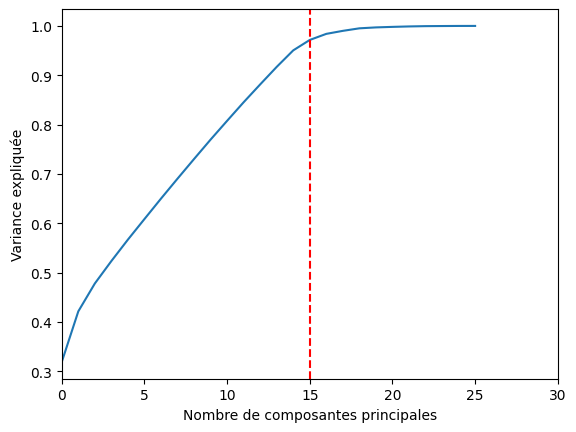

In [63]:
plot_pca(ethical_train_set_prepared)

C:\Users\mathi\AppData\Local\Temp\ipykernel_21192\3554798481.py:30: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 30, 5)


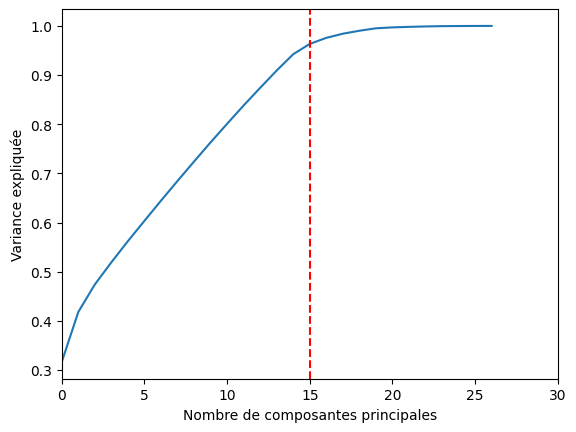

In [64]:
plot_pca(useful_train_set_prepared)

Pour les 2 jeux de données, la réduction de la dimentionnalité semble adaptée. Pour cela, nous allons utiliser l'ACP. Grace au graphique ci-dessus, nous pouvons voir que les 2 jeux de données sont très proches. Nous allons donc utiliser le même nombre de composantes pour les 2 jeux de données : **15**.


In [65]:
# # Use of PCA to reduce the number of features
# from sklearn.decomposition import PCA
# useful_train_set_prepared_attr = useful_train_set_prepared.keys()

# pca = PCA(n_components=15)
# useful_train_set_prepared = pd.DataFrame(pca.fit_transform(useful_train_set_prepared), columns=[
#                                          'PCA%i' % i for i in range(15)], index=useful_train_set_prepared.index)

# useful_train_set_prepared

Pour récupérer les données initiales


In [66]:
# pd.DataFrame(pca.inverse_transform(useful_train_set_prepared),
#              columns=useful_train_set_prepared_attr).info()

### Ajout de la réduction de la dimensionnalité dans la pipeline


In [67]:
class RemoveUselessFeatures():
    """
    Remove useless features from the dataset.

    Parameters
    ----------
    useless_features : list
        List of useless features to remove.

    Attributes
    ----------
    useless_features : list
        List of useless features to remove.

    Methods
    -------
    fit(X, y=None)
        Fit the transformer.

    transform(X, y=None)
        Transform the dataset.
    """

    def __init__(self, columns_to_drop) -> None:
        """
        Parameters
        ----------
        columns_to_drop : list
            List of columns to drop.

        Returns
        -------
        None
        """
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        """
        Fit the transformer.

        Parameters
        ----------
        X : pandas.DataFrame
            Dataset to fit the transformer.

        y : pandas.Series
            Target to fit the transformer.

        Returns
        -------
        self
        """
        return self

    def transform(self, X, y=None):
        """
        Transform the dataset.

        Parameters
        ----------
        X : pandas.DataFrame
            Dataset to transform.

        y : pandas.Series
            Target to transform.

        Returns
        -------
        pandas.DataFrame
            Transformed dataset.
        """
        return X.drop(self.columns_to_drop, axis=1)


In [68]:
useful_full_pipeline = Pipeline([
    ('pipeline', useful_full_pipeline),
    ('remove_useless_features', RemoveUselessFeatures(useful_useless_features)),
    # ('pca', PCA(n_components=15)),
])

In [69]:
ethical_full_pipeline = Pipeline([
    ('pipeline', ethical_full_pipeline),
    ('remove_useless_features', RemoveUselessFeatures(ethical_useless_features)),
    # ('pca', PCA(n_components=15)),
])


## Préparation des jeux de test


In [70]:
# useful_test_set_prepared = pd.DataFrame(useful_full_pipeline.fit_transform(X_useful_test_set), columns=[
#     'PCA%i' % i for i in range(15)])


In [71]:
# ethical_test_set_prepared = pd.DataFrame(ethical_full_pipeline.fit_transform(X_ethical_test_set), columns=[
#     'PCA%i' % i for i in range(15)])


## Sauvegarde du jeu de données


In [72]:
import pickle

# Save data
path_data = "./data/prepared_data/"
path_ethical = path_data + "ethical/"
path_useful = path_data + "useful/"

# make directory if not exists
if not os.path.exists(path_data):
    os.makedirs(path_data)
if not os.path.exists(path_ethical):
    os.makedirs(path_ethical)
if not os.path.exists(path_useful):
    os.makedirs(path_useful)

# -- Useful --
# Train set
with open(path_useful + "X_useful_train.pkl", "wb") as f:
    pickle.dump(useful_train_set_prepared, f)
with open(path_useful + "Y_useful_train.pkl", "wb") as f:
    pickle.dump(y_useful_train_set, f)
# Test set
with open(path_useful + "X_useful_test.pkl", "wb") as f:
    pickle.dump(useful_test_set_prepared, f)
with open(path_useful + "Y_useful_test.pkl", "wb") as f:
    pickle.dump(y_useful_test_set, f)

# -- Ethical --
# Train set
with open(path_ethical + "X_ethical_train.pkl", "wb") as f:
    pickle.dump(ethical_train_set_prepared, f)
with open(path_ethical + "Y_ethical_train.pkl", "wb") as f:
    pickle.dump(y_ethical_train_set, f)
# Test set
with open(path_ethical + "X_ethical_test.pkl", "wb") as f:
    pickle.dump(ethical_test_set_prepared, f)
with open(path_ethical + "Y_ethical_test.pkl", "wb") as f:
    pickle.dump(y_ethical_test_set, f)